<a href="https://colab.research.google.com/github/SaikatGhosh94/MachineLearningCourse/blob/main/Hands_on_practice/Clustering/03_Heirarchial_Clustering_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cluster_mpg.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [6]:
df['origin'].value_counts()

,count
origin,
usa,245
japan,79
europe,68


In [7]:
df_w_dummies = pd.get_dummies(df.drop('name',axis =1))

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_w_dummies)

scaled_df = pd.DataFrame(scaled_data, columns = df_w_dummies.columns)

<Axes: >

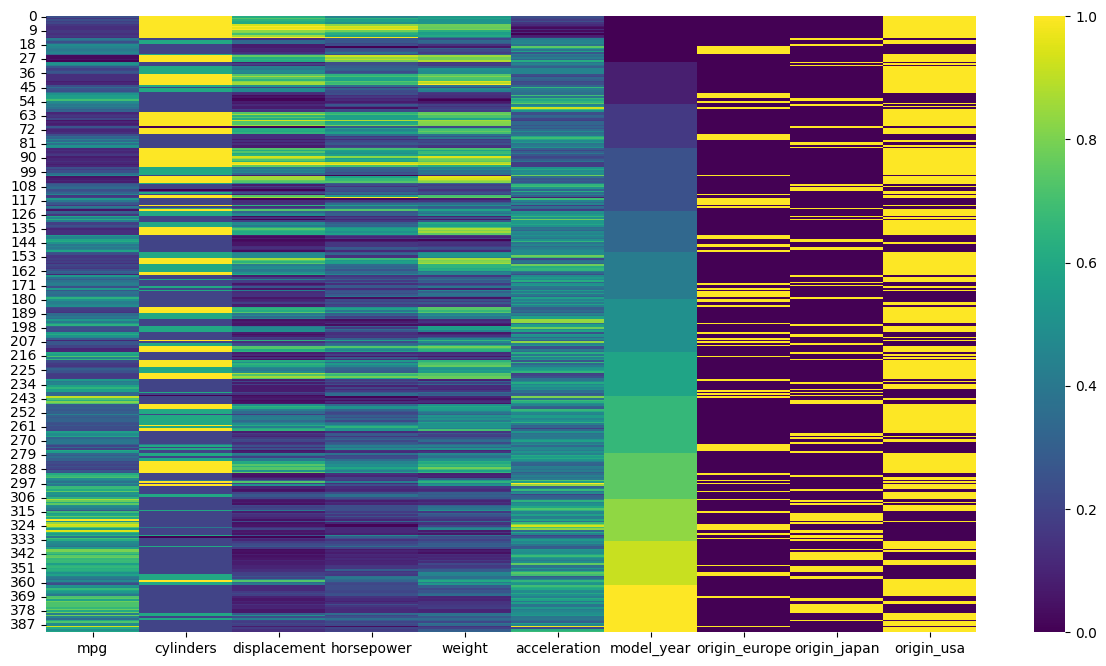

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_df,cmap='viridis')

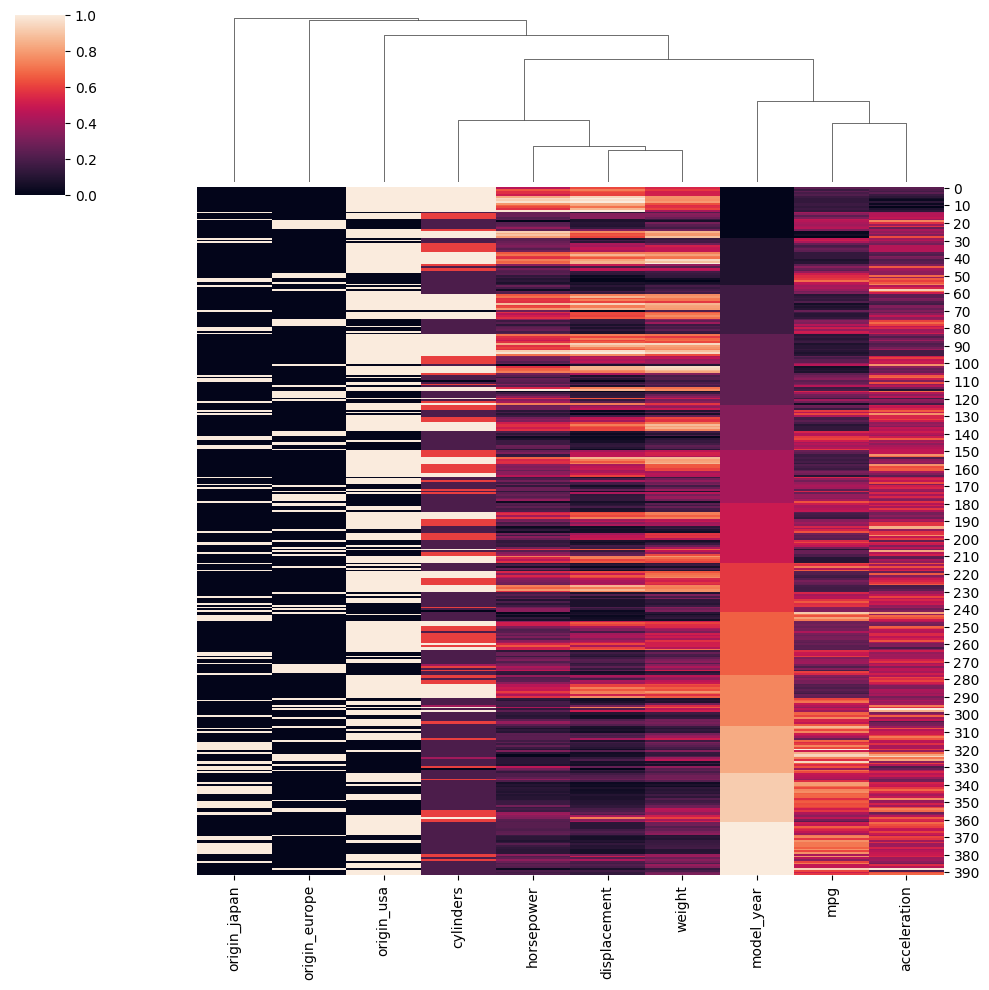

In [11]:
sns.clustermap(scaled_df,row_cluster=False)

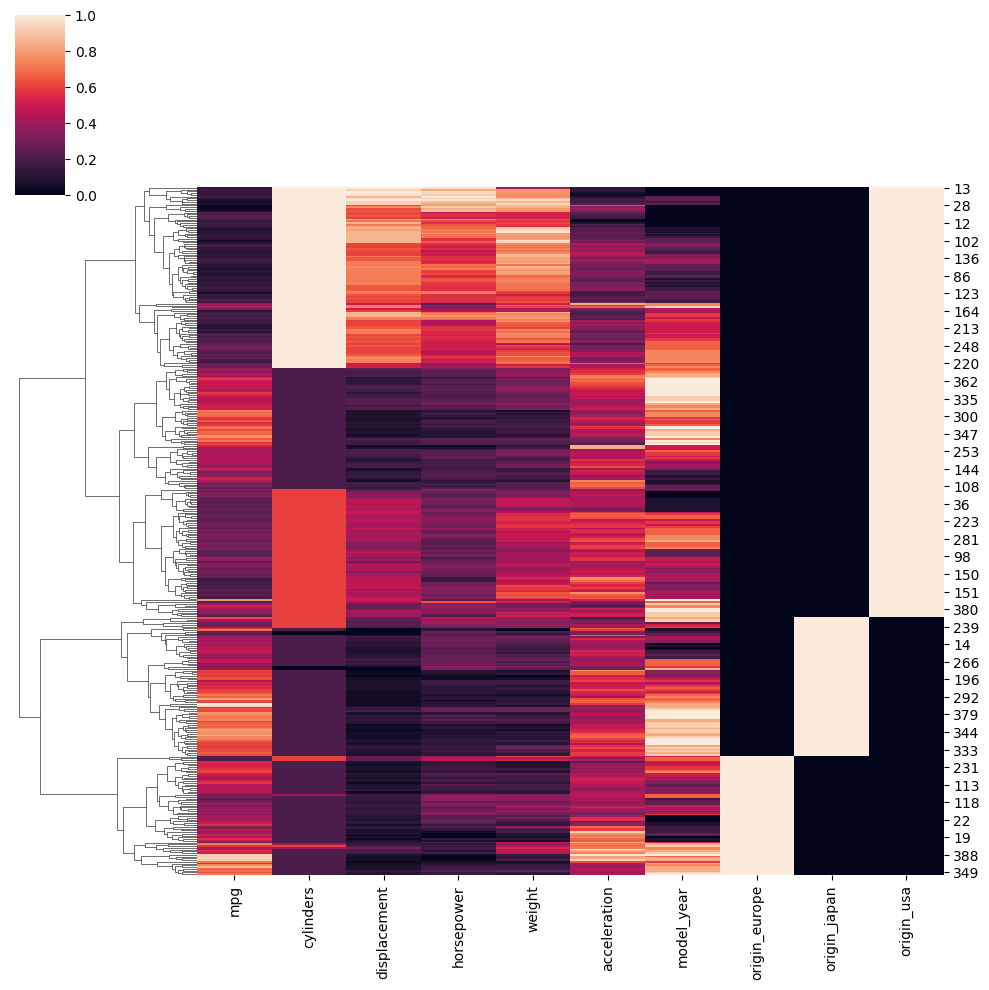

In [12]:
sns.clustermap(scaled_df,col_cluster=False)

In [14]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)
cluster_labels = model.fit_predict(scaled_df)
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

In [15]:
np.unique(cluster_labels)

array([0, 1, 2, 3])

<Axes: xlabel='mpg', ylabel='weight'>

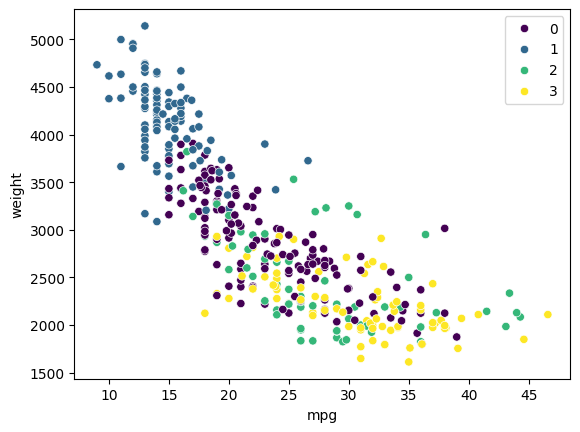

In [16]:
sns.scatterplot(data=df,x='mpg',y='weight',hue=cluster_labels,palette='viridis')

<Axes: xlabel='horsepower', ylabel='weight'>

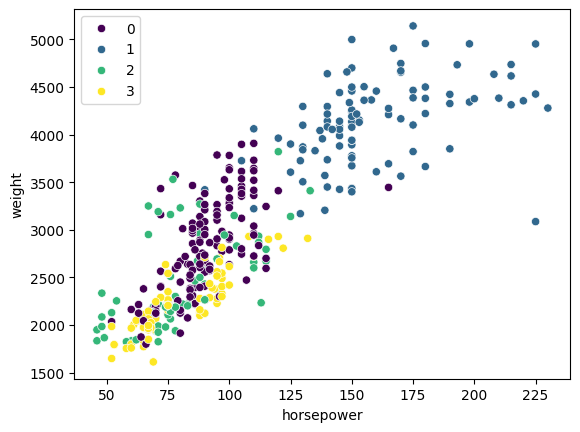

In [17]:
sns.scatterplot(data=df,x='horsepower',y='weight',hue=cluster_labels,palette='viridis')

In [20]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)
cluster_labels = model.fit_predict(scaled_df)
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [24]:
from scipy.cluster import hierarchy

linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

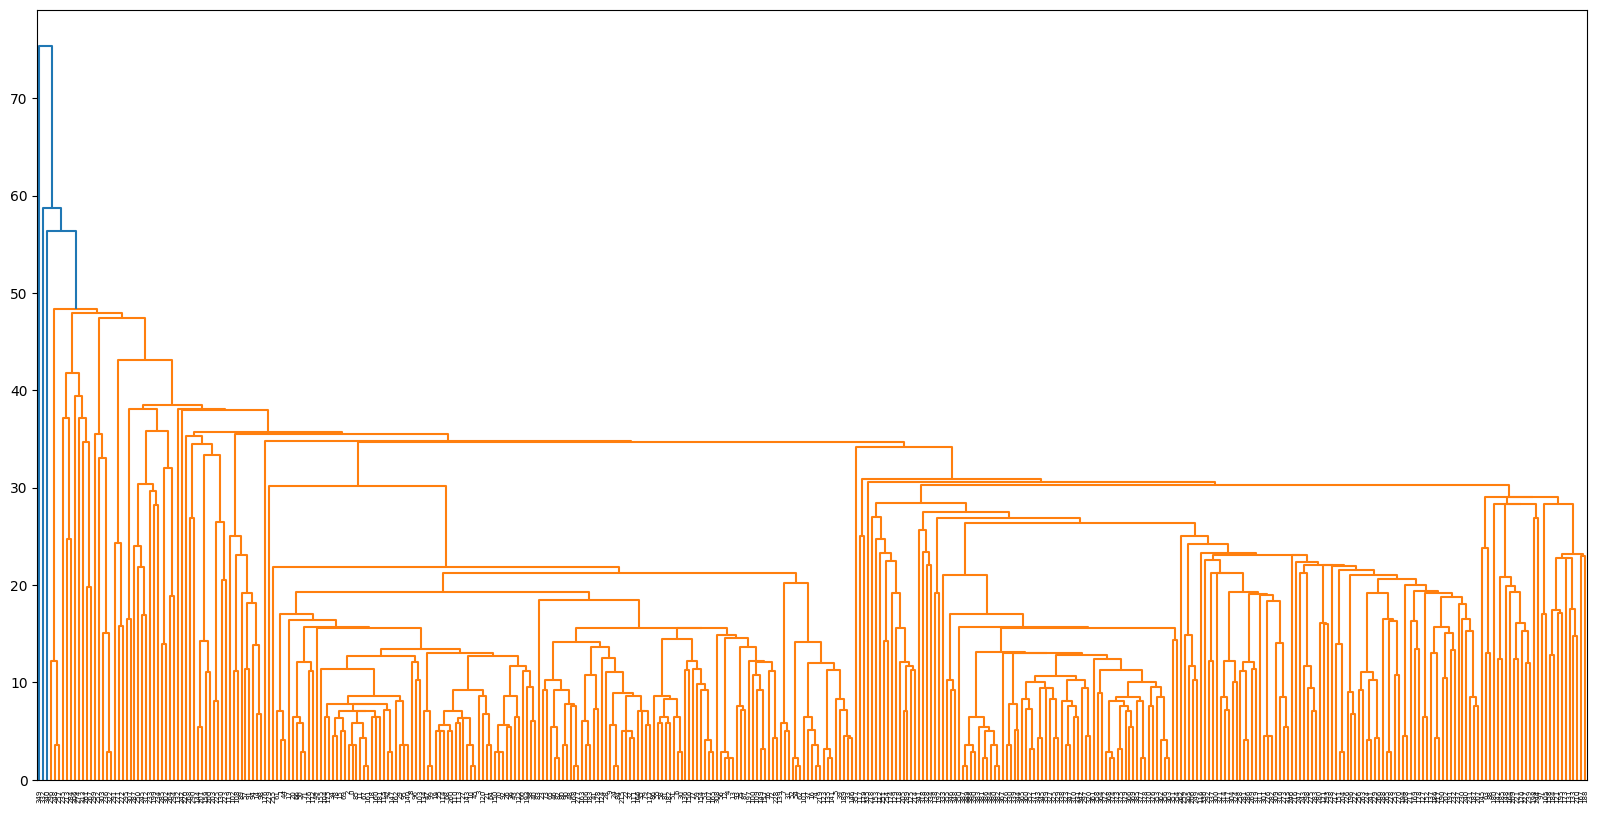

In [28]:
plt.figure(figsize=(20,10))
dendro = hierarchy.dendrogram(linkage_matrix)
plt.xticks(rotation=90);

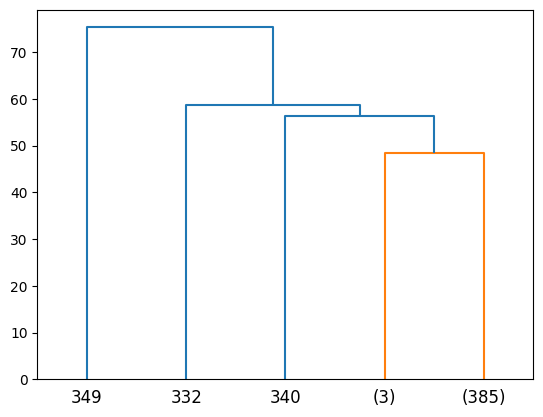

In [29]:
dendro = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=3)

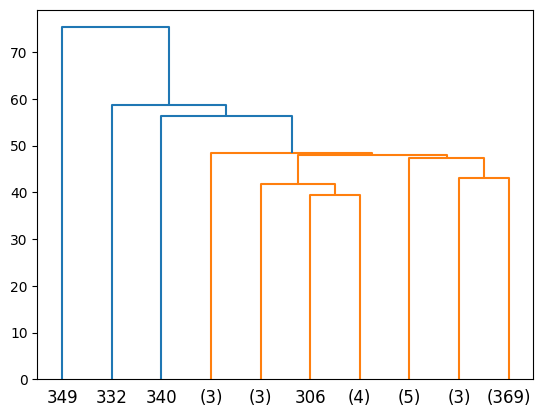

In [30]:
dendro = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=10)

In [31]:
scaled_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
np.sqrt(len(scaled_df))

np.float64(19.79898987322333)

In [37]:
scaled_df['mpg'].idxmax()

320

In [38]:
scaled_df['mpg'].idxmin()

28

In [42]:
car_a = scaled_df.iloc[scaled_df['mpg'].idxmax()]
car_b = scaled_df.iloc[scaled_df['mpg'].idxmin()]

distance = np.linalg.norm(car_a - car_b)
distance

np.float64(2.3852929970374714)